<a href="https://colab.research.google.com/github/leejineun/ai-class/blob/main/5_Cifar10_%EC%88%98%EC%97%85_%EC%99%84%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Label	Description

0	airplane

1	automobile

2	bird

3	cat

4	deer

5	dog

6	frog

7	horse

8	ship

9	truck

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import urllib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')


In [ ]:
cifar = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

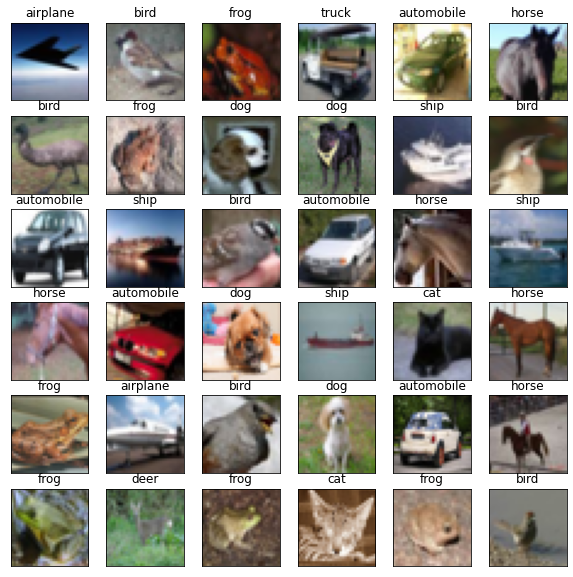

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(36) : 
    j = np.random.randint(50001)
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[j])
    label_index = int(y_train[j])
    plt.title(class_names[label_index])
plt.show()

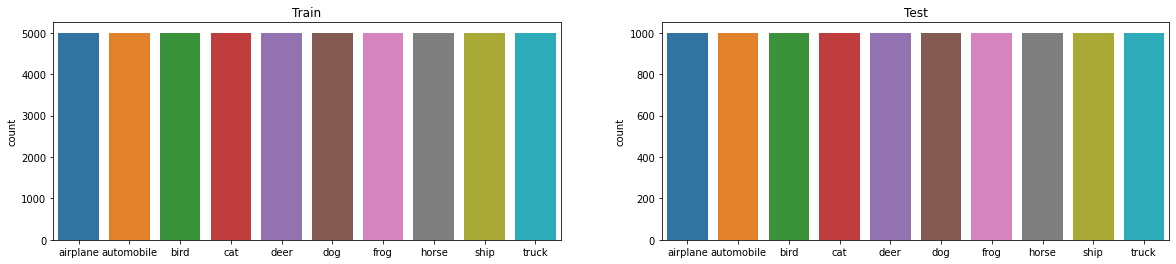

In [ ]:
# import seaborn as sns

plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
sns.countplot(y_train.ravel())
plt.xticks(np.arange(10), class_names)
plt.title('Train')

plt.subplot(1, 2, 2)
sns.countplot(y_test.ravel())
plt.xticks(np.arange(10), class_names)
plt.title('Test')
plt.show()

In [ ]:
# X_train, X_test 정규화
X_train, X_test = X_train / 255., X_test / 255.

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

### 인코딩


- 원핫 인코딩 (숫자/string -> array)
    - keras : to_categorical
    - sklearn : from sklearn.preprocessing import OneHotEncoder

- 라벨 인코딩 (문자열 -> 숫자)
    - from sklearn.preprocessing import LabelEncoder

In [ ]:
class_dict = {0: 'airplane',
1: 'automobile',
2: 'bird',
3: 'cat',
4: 'deer',
5: 'dog',
6: 'frog',
7: 'horse',
8: 'ship',
9: 'truck'}

In [ ]:
# label -> string (원래 클래스명을 알아야 할 때 사용)
tmp_y_train = [0, 3, 4, 3, 7]
tmp_y_string_train = []
for label in tmp_y_train : 
    tmp_y_string_train.append(class_dict[label])

print(tmp_y_string_train)

['airplane', 'cat', 'deer', 'cat', 'horse']


In [ ]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(32, 32, 3))) # input_shape = X_train[1:]
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=(16, 16, 32))) # input_shape = X_train[1:]
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, 3, padding='same', activation='relu', input_shape=(8, 8, 64))) # input_shape = X_train[1:]
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten()) # image_shape = (4, 4, 128)
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) # acc / accuracy

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

In [ ]:
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
# 과적합 모델
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

In [ ]:
# patience
# 17th val-loss : 0.3
# .......... : 0.31212

# 17th val-loss : 0.3
# fianl : val_loss = 0.37

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4614 - acc: 0.4663 - val_loss: 1.1631 - val_acc: 0.5892
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0645 - acc: 0.6234 - val_loss: 0.9627 - val_acc: 0.6553
Epoch 3/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9184 - acc: 0.6752 - val_loss: 0.8424 - val_acc: 0.7055
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8153 - acc: 0.7109 - val_loss: 0.8218 - val_acc: 0.7134
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7410 - acc: 0.7378 - val_loss: 0.7447 - val_acc: 0.7423
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6796 - acc: 0.7598 - val_loss: 0.7322 - val_acc: 0.7515
Epoch 7/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6260 - acc: 0.7793 - val_loss: 0.7530 - val_acc: 0.7414
Epoch 8/100
1563/1563 [==============================] 

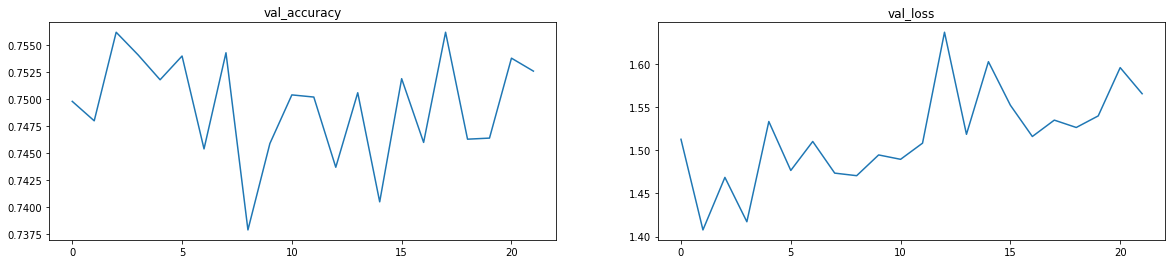

In [ ]:
plt.figure(figsize=(20, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['val_acc']) # metrics= accuracy -> val_accuracy  acc -> val_acc
plt.title('val_accuracy')
plt.subplot(1,2,2)
plt.plot(hist.history['val_loss'])
plt.title('val_loss')
plt.show()

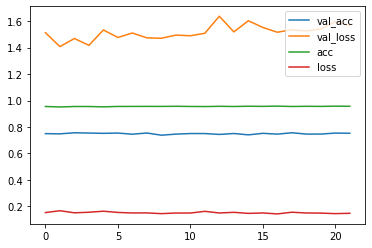

In [ ]:
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.legend(['val_acc', 'val_loss', 'acc', 'loss'])
plt.show()

In [ ]:
!ls

In [ ]:
my_model = load_model('./best_model.h5')

In [ ]:
def url_to_image(url) : 
    res = urllib.request.urlopen(url)
    image = np.asarray(bytearray(res.read()), dtype='uint8')

    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32), interpolation= cv2.INTER_AREA)
    return image

In [ ]:
test_img = url_to_image('https://images.chosun.com/resizer/J-zQaF2Cxnc3535ZzOjPJzV6pGo=/640x383/smart/cloudfront-ap-northeast-1.images.arcpublishing.com/chosun/T5RCHV6YTT3KVF2PS6I527F5VU.jpg')

In [ ]:
test_img.shape

In [ ]:
plt.imshow(test_img)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
class_names= list(class_dict.values())

In [ ]:
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
encoder = LabelEncoder()
encoder.fit(class_names)

label_class_names = encoder.transform(class_names)
one_hot_classes = to_categorical(label_class_names, 10)

In [ ]:
class_names_dict = {}

for i, name in enumerate(class_names) : 
    class_names_dict[name] = one_hot_classes[i]

In [ ]:
class_names_dict

{'airplane': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 'automobile': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 'bird': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 'cat': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 'deer': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 'dog': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 'frog': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 'horse': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 'ship': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32),
 'truck': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)}

In [ ]:
test_img = np.expand_dims(test_img, axis=0)
result = my_model.predict(test_img)

In [ ]:
result

array([[0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 4.721919e-23, 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [ ]:
def get_key_by_value(class_names_dict, keyword) : 
    for key, value in class_names_dict.items() : 
        if list(value.astype(np.int32)) == list(np.array(result[0]).astype(np.int32)) : 
            print(key)
            return key

In [ ]:
# def get_key_by_value(class_names_dict, keyword) : 
#     for key, value in class_names_dict.items() : 
#         if list(value) == list(np.array(result[0])) : 
#             print(key)
#             return key

#--> 이게 안되면 위의 방법 사용

In [ ]:
get_key_by_value(class_names_dict, result)

bird


'bird'

In [ ]:
# 최적의 파라미터를 찾는 방법 : GridSearchCV

In [ ]:
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(32, 32, 3))) # input_shape = X_train[1:]
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=(16, 16, 32))) # input_shape = X_train[1:]
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, 3, padding='same', activation='relu', input_shape=(8, 8, 64))) # input_shape = X_train[1:]
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten()) # image_shape = (4, 4, 128)
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
dropout_values = [0.0, 0.2, 0.4, 0.6, 0.8]

In [ ]:
val_losses = []
val_accs = []
for value in dropout_values : 
    model = Sequential()

    model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(32, 32, 3))) # input_shape = X_train[1:]
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(value))

    model.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=(16, 16, 32))) # input_shape = X_train[1:]
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(value))

    model.add(Conv2D(128, 3, padding='same', activation='relu', input_shape=(8, 8, 64))) # input_shape = X_train[1:]
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(value))

    model.add(Flatten()) # image_shape = (4, 4, 128)
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) # acc / accuracy

    hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

    tmp_loss = hist.history['val_loss']
    tmp_acc = hist.history['val_acc']

    print(f'DropOut = {value} Validation-loss = {tmp_loss} ')
    print(f'DropOut = {value} Validation-accuracy = {tmp_acc} ')

    val_losses.append(hist.history['val_loss'])
    val_accs.append(hist.history['val_acc'])

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3333 - acc: 0.5220 - val_loss: 1.0122 - val_acc: 0.6392
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9107 - acc: 0.6809 - val_loss: 0.8936 - val_acc: 0.6864
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7382 - acc: 0.7400 - val_loss: 0.8429 - val_acc: 0.7023
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6027 - acc: 0.7864 - val_loss: 0.8166 - val_acc: 0.7191
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4802 - acc: 0.8314 - val_loss: 0.8066 - val_acc: 0.7372
DropOut = 0.0 Validation-loss = [1.0122159719467163, 0.8935540914535522, 0.8429096937179565, 0.8165771961212158, 0.8065602779388428] 
DropOut = 0.0 Validation-accuracy = [0.63919997215271, 0.6863999962806702, 0.7023000121116638, 0.7190999984741211, 0.7372000217437744] 
Epoch 1/5
1563/1563 [==============================] - 9s 5ms/ste

In [ ]:
for loss in val_losses : 
    print(loss[-1])

0.8065602779388428
0.7420758605003357
0.8483282923698425
1.401366949081421
3.448260545730591


In [ ]:
for acc in val_accs : 
    print(acc[-1])

0.7372000217437744
0.7372000217437744
0.70169997215271
0.5181999802589417
0.13840000331401825
